In [29]:
import history_rates as hr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import interp1d
sns.set_theme()


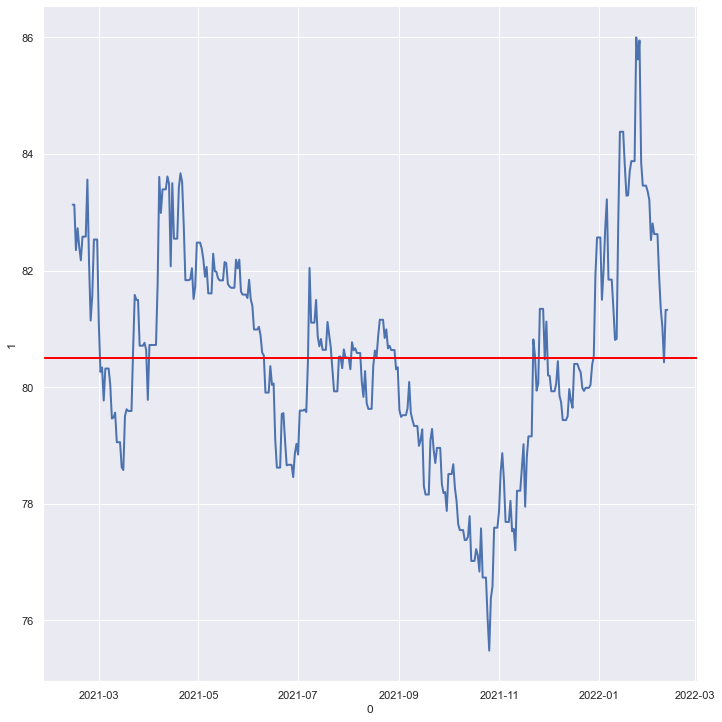

In [71]:
r = hr.FxtopRate('20220213', 'CHF', 'RUB')
df = r.get_rates()
g = sns.relplot(data=df, kind="line", x=df[0], y=df[1], height=10,linewidth=2)
axes = g.axes.flatten()
for ax in axes:
    ax.axhline(df[1].mean(), ls='-', linewidth=2, color='red')

In [47]:
lowess = sm.nonparametric.lowess(df[1], df[0], frac=.05)

In [48]:
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

In [49]:
ynew = f(df[0])

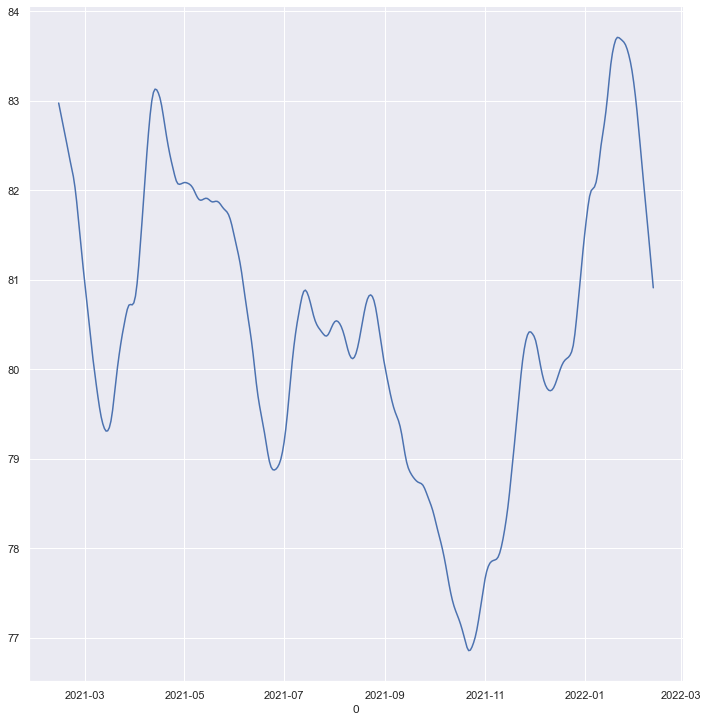

In [50]:
sns.relplot(data=df, kind="line", x=df[0], y=ynew, height=10)